In [6]:
%store -r udp_norm
%store -r tcp_norm
%store -r Udp_protocol2
%store -r ad
%store -r ad1


In [7]:
Udp_protocol2

,ts,uid,proto,service,duration,orig_bytes,resp_bytes,conn_state,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
87,1.525880e+09,CwxSC63ae0nsF5U8Rc,udp,-,-,-,-,S0,1.0,40.0,0.0,0.0,Benign
91,1.525880e+09,CC6vK11dpBdpp6Tp82,udp,-,-,-,-,S0,1.0,40.0,0.0,0.0,Benign
93,1.525880e+09,Cwm6z43XICYNco6X3c,udp,-,-,-,-,S0,1.0,40.0,0.0,0.0,Benign
96,1.525880e+09,CSORLf11E0Qucikaj5,udp,-,-,-,-,S0,1.0,40.0,0.0,0.0,Benign
98,1.525880e+09,COoNg7tQKZ6vEkt2g,udp,-,-,-,-,S0,1.0,40.0,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444446,1.532526e+09,C5HdESA2dkFzwa4F8,udp,-,-,-,-,S0,1.0,134.0,0.0,0.0,Benign
1444447,1.532526e+09,COkwWr1uTp0o3DcGL1,udp,-,-,-,-,S0,1.0,134.0,0.0,0.0,Benign
1444448,1.532526e+09,Cyho7B4IE5jHabwQo3,udp,-,32.008033,318,0,S0,3.0,402.0,0.0,0.0,Benign
1444449,1.532526e+09,C9UxUV2e6wjjzMwCfj,udp,-,16.001901,212,0,S0,2.0,268.0,0.0,0.0,Benign


In [5]:
from sklearn.cluster import KMeans
from numpy import unique
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import Birch
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
#df_summary['ip.proto'] = df['ip.proto'].mean()
#ad['ip.src.len.mean'] = ad['id.orig_h'].mean()
#ad['ip.src.len.median'] = ad['id.orig_h'].median()
#ad['ip.src.len.var'] = ad['id.orig_h'].var()
#ad['ip.src.len.std'] = ad['id.orig_h'].std()


In [11]:

import numpy as np
import pandas as pd
from sklearn import preprocessing

def prot(ad):
    tcpcols = ad.columns
    ztcp = ad.values
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(ztcp)
    tnormalized = pd.DataFrame(x_scaled, columns = tcpcols )
    wss = []
    K = range(1,12)

    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=123)
        kmeans = kmeans.fit(tnormalized)
        wss.append(kmeans.inertia_)

    plt.plot(K, wss, "b*-")
    plt.xlabel("Number of clusters k")
    plt.ylabel("Total Within Sum of Squares")
    plt.title("UDP-Optimal number of clusters")
    plt.show()
    
def prot(ad1):
    tcpcols = ad1.columns
    ztcp = ad1.values
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(ztcp)
    tnormalized1 = pd.DataFrame(x_scaled, columns = tcpcols )
    wss = []
    K = range(1,12)

    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=123)
        kmeans = kmeans.fit(tnormalized1)
        wss.append(kmeans.inertia_)

    plt.plot(K, wss, "b*-")
    plt.xlabel("Number of clusters k")
    plt.ylabel("Total Within Sum of Squares")
    plt.title("UDP-Optimal number of clusters")
    plt.show()
    

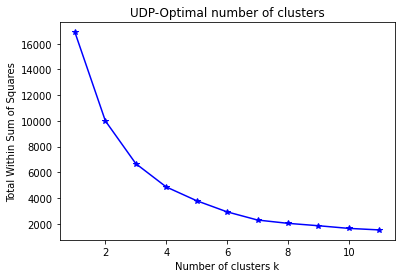

In [8]:
prot(ad)


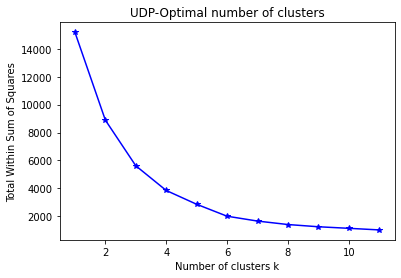

In [12]:
prot(ad1)


In [ ]:
wss = []
K = range(1,12)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans = kmeans.fit(tnormalized)
    wss.append(kmeans.inertia_)

plt.plot(K, wss, "b*-")
plt.xlabel("Number of clusters k")
plt.ylabel("Total Within Sum of Squares")
plt.title("UDP-Optimal number of clusters")
plt.show()

In [ ]:

from sklearn.model_selection import GridSearchCV
def kmeancluster(cluster):
    
    kmeans = KMeans(n_clusters = cluster)
    label = kmeans.fit_predict(tnormalized)
    centers = np.array(kmeans.cluster_centers_)
    plt.figure(figsize=(5,4))
    uniq = np.unique(label)
   
    Udp_protocol2['clusterlabel']= kmeans.labels_
    seedfsd1= Udp_protocol2[['label', 'clusterlabel']]
    ax = plt.axes()
    
    sns.histplot(binwidth=0.5, x="label", hue="clusterlabel", data=seedfsd1, stat="probability", shrink=0.3, multiple="stack", common_norm=False)
    #sns.histplot(binwidth=0.5, x="label", hue="clusterlabel", data=seedfsd1, stat="density", shrink=0.3, multiple="stack",common_norm=False)
    ax.set_title('Kmeans-UDP Comparison of clusters and labels after K-means clustering algorithm'+ "-"  + str(cluster))
    plt.xticks(rotation=90)
                 
    return label
    

In [ ]:
kmeancluster(4)

In [ ]:
Udp_protocol2[Udp_protocol2['clusterlabel'] == 3]['label'].value_counts(normalize=True) * 100


In [ ]:
g=KMeans(n_clusters=4, init='random', n_init=10)
b=g.fit(tnormalized).labels_

In [ ]:
b

In [ ]:
from sklearn.metrics import make_scorer,adjusted_rand_score
#j=b.reshape(-1, 1)

sc=make_scorer(adjusted_rand_score)
km=KMeans(n_clusters=3)
from sklearn.model_selection import GridSearchCV
parameters = {'init':('k-means++', 'random'),'max_iter':[100,200,300],'n_init':[5,10,15]}
clf = GridSearchCV(km, parameters,scoring=sc)
clf.fit(tnormalized, b)
indx=clf.cv_results_['rank_test_score'].tolist().index(1)
print("ARI score mean :"+str(clf.cv_results_['mean_test_score'][indx]))
print("Best parameters: "+str(clf.best_params_))

In [ ]:
kmeancluster(2)

In [ ]:
le1 = LabelEncoder()   
UdP_label=le1.fit_transform(Udp_protocol2['label'])

In [ ]:
s_array = Udp_protocol2[["clusterlabel"]].to_numpy()

In [ ]:
print(confusion_matrix(UdP_label,s_array))

In [ ]:
from sklearn.metrics import recall_score
tpr = recall_score(UdP_label, s_array, pos_label='positive', average='micro')   # it is better to name it y_test 
# to calculate, tnr we need to set the positive label to the other class
# I assume your negative class consists of 0, if it is -1, change 0 below to that value
tnr = recall_score(UdP_label, s_array, pos_label='positive', average='micro') 
fpr = 1 - tnr
fnr = 1 - tpr

In [ ]:
tpr

In [ ]:
fpr

In [ ]:
tnr 

In [ ]:
kmeancluster(3)

In [ ]:
kmeancluster(4)

In [ ]:
kmeancluster(5)

In [ ]:
'''
algorithm3 = KMeans(n_clusters = 5, init='k-means++',  random_state=123)
algorithm3.fit(udp_norm)
Udp_protocol2['clusterlabel']= algorithm3.labels_


'''

In [ ]:
#seedfsd1= Udp_protocol2[['label', 'clusterlabel']]

In [ ]:
#seedfsd.to_csv('ad.csv')

In [ ]:
'''

ax = plt.axes()

sns.histplot(binwidth=0.5, x="label", hue="clusterlabel", data=seedfsd1, stat="density", shrink=0.3, multiple="stack",common_norm=False)
ax.set_title('Kmeans-UDP-Comparison of clusters and labels after clustering')
plt.xticks(rotation=90)



'''

### Birch algorithms for UDP protocol

In [ ]:

def birch(cluster):
    model_br = Birch(threshold=0.01, n_clusters=cluster)
    model_br.fit(tnormalized)
    yhat_br = model_br.predict(tnormalized)
    clusters_br = unique(yhat_br)
    Udp_protocol2['clusterlabel'] = model_br.labels_
    seedfsd3= Udp_protocol2[['label', 'clusterlabel']]
    ax = plt.axes()
    sns.histplot(binwidth=0.5, x="label", hue="clusterlabel", data=seedfsd3, stat="density", shrink=0.3, multiple="stack",common_norm=False)
    ax.set_title('UDP-Comparison of clusters and labels after Birch clustering')
    plt.xticks(rotation=90)
    return Udp_protocol2

In [ ]:
birch(6)

In [ ]:
def plot(cluster):
    prop_df = (['label'].groupby(Udp_protocol2['cluster'])
           .value_counts(normalize=True)
           .rename('percent')
           .reset_index())

    ax2= sns.barplot(x='label', y='percent', hue='cluster', data=prop_df)
    
    plt.figure(figsize=(6,8))
    #ax2=Udp_protocol2.groupby('label')['cluster'].value_counts().unstack().plot.bar()
    ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    #plt.legend(title="Clusters")
    #ax2.set_ylabel("Count")
    ax2.set_title('Kmeans cluster'+ " "  + str(cluster)+ " "+ 'TCP-Comparison of clusters and labels, labels vs percent plot')
    plt.gcf().set_size_inches(6, 5)
    
    return

In [ ]:
s_array1 = Udp_protocol2[["clusterlabel"]].to_numpy()

In [ ]:
print(confusion_matrix(UdP_label,s_array1))

In [ ]:
birch(3)

In [ ]:
s_array2 = Udp_protocol2[["clusterlabel"]].to_numpy()

In [ ]:
print(confusion_matrix(UdP_label,s_array2))

In [ ]:
from sklearn.metrics import recall_score
tpr = recall_score(UdP_label, s_array2, average='weighted')   # it is better to name it y_test 
# to calculate, tnr we need to set the positive label to the other class
# I assume your negative class consists of 0, if it is -1, change 0 below to that value
tnr = recall_score(UdP_label, s_array2, pos_label="positive", average='weighted') 
fpr = 1 - tnr
fnr = 1 - tpr

In [ ]:
tpr

In [ ]:
tnr

In [ ]:
fpr

In [ ]:
fnr

In [ ]:
    b        p   d
b[[10969     1 42627]
p [    0     0    22]
 d[    0     0     3]]

In [ ]:
birch(5)

In [ ]:
birch(5)

In [ ]:
reduction_pca = PCA(n_components=2)
reduced_features = reduction_pca.fit_transform(udp_norm)
def brichcluster(cluster):
    model_br = Birch(threshold=0.01, n_clusters=cluster)
    model_br.fit(udp_norm)
    label =  model_br.predict(udp_norm)
    #centers = np.array( model_br.cluster_centers_)

    plt.figure(figsize=(5,4))
    uniq = np.unique(label)
    ax = plt.axes()

    #Udp_protocol2['clusterlabel']= model_br.predict(udp_norm)
    for i in uniq:
        plt.scatter(reduced_features[label == i , 0] , reduced_features[label == i , 1] , label = i)
    #plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')

    plt.xlabel([])
    ax.set_title('UDP-Birch + PCA algorithms plot cluster'+ "-"  + str(cluster))

    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()
    plt.show()
    
    return 

In [ ]:
brichcluster(2)

In [ ]:
brichcluster(3)

In [ ]:
brichcluster(4)

In [ ]:
brichcluster(5)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
ax = plt.axes()
sns.histplot(binwidth=0.6, x="label", hue="label", data=Udp_protocol2, stat = 'frequency', shrink=.2, common_norm=False)
ax.set_title('UDP protocol labels count')
plt.xticks(rotation=45)
plt.show()

### ICMP protocol

In [ ]:
%store -r ICMP_protocol3

In [ ]:
ICMP_protocol3

In [ ]:
%matplotlib inline
ax = plt.axes()
sns.histplot( x="label", hue="label", data=ICMP_protocol3, stat = "count", shrink=.1, common_norm=True)
ax.set_title('TCP protocol labels count')
plt.xticks(rotation=45)
plt.show()

### leave after this cell

In [ ]:
from sklearn.decomposition import PCA

reduction_pca = PCA(n_components=2)
reduced_features = reduction_pca.fit_transform(udpfeatures)

In [ ]:
model_br = Birch(threshold=0.01, n_clusters=5)
clusters=model_br.fit(udpfeatures)


In [ ]:
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], label='Datapoints')
plt.scatter(clusters.cluster_centers_[:, 0], clusters.cluster_centers_[:, 1], label='Clusters')
plt.title("UDP Brich clustering")
plt.legend()
plt.show()

## leave below cell

In [ ]:
udp_norm1= udp_norm.iloc[:, 0:2]
udp_norm2= udp_norm.iloc[:, [0,3]]
udp_norm3= udp_norm.iloc[:, [0,4]]
udp_norm4= udp_norm.iloc[:, [0,5]]
#udp_norm5= udp_norm.iloc[:, [0,6]]


In [ ]:
udp_normorig_bytes1= udp_norm.iloc[:, [1,2]]
udp_normorig_bytes2= udp_norm.iloc[:, [1,3]]
udp_normorig_bytes3= udp_norm.iloc[:, [1,4]]
udp_normorig_bytes4= udp_norm.iloc[:, [1,5]]

In [ ]:
udp_normresp_bytes1= udp_norm.iloc[:, [2,3]]
udp_normresp_bytes2= udp_norm.iloc[:, [2,4]]
udp_normresp_bytes3= udp_norm.iloc[:, [1,5]]


In [ ]:
udp_normconn_state1= udp_norm.iloc[:, [3,4]]
udp_normconn_state2= udp_norm.iloc[:, [3,5]]

In [ ]:
udp_normorig_pkts1=udp_norm.iloc[:, [4,5]]

In [ ]:
udp_normconn_state1

In [ ]:
udp_norm1w= udp_norm.iloc[:, 1:3]

In [ ]:
udp_norm2w=udp_norm.iloc[:, [1,3]]

In [ ]:
udp_norm2w

In [ ]:


def ad():
    wss = []
    K = range(2,11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=123)
        kmeans = kmeans.fit(udp_norm1)
        wss.append(kmeans.inertia_)
    plt.plot(K, wss, "b*-")
    plt.xlabel("Number of clusters k")
    plt.ylabel("Total Within Sum of Squares")
    plt.title("Optimal number of clusters")
plt.show()


def addd():
    wss = []
    K = range(2,11)
    for k1 in K1:
        kmeans = KMeans(n_clusters=k, random_state=123)
        kmeans = kmeans.fit(udp_norm2)
        wss.append(kmeans.inertia_)
    plt.plot(K, wss, "b*-")
    plt.xlabel("Number of clusters k")
    plt.ylabel("Total Within Sum of Squares")
    plt.title("Optimal number of clusters")
plt.show()

def adddd():
    wss = []
    K = range(2,11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=123)
        kmeans = kmeans.fit(udp_norm3)
        wss.append(kmeans.inertia_)
    plt.plot(K, wss, "b*-")
    plt.xlabel("Number of clusters k")
    plt.ylabel("Total Within Sum of Squares")
    plt.title("Optimal number of clusters")
plt.show()

def addddd():
    wss = []
    K = range(2,11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=123)
        kmeans = kmeans.fit(udp_norm4)
        wss.append(kmeans.inertia_)
    plt.plot(K, wss, "b*-")
    plt.xlabel("Number of clusters k")
    plt.ylabel("Total Within Sum of Squares")
    plt.title("Optimal number of clusters")
plt.show()

def orig_bytes1():
    wss = []
    K = range(2,11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=123)
        kmeans = kmeans.fit(udp_normorig_bytes1)
        wss.append(kmeans.inertia_)
    plt.plot(K, wss, "b*-")
    plt.xlabel("Number of clusters k")
    plt.ylabel("Total Within Sum of Squares")
    plt.title("Optimal number of clusters")
plt.show()

def orig_bytes2():
    wss = []
    K = range(2,11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=123)
        kmeans = kmeans.fit(udp_normorig_bytes2)
        wss.append(kmeans.inertia_)
    plt.plot(K, wss, "b*-")
    plt.xlabel("Number of clusters k")
    plt.ylabel("Total Within Sum of Squares")
    plt.title("Optimal number of clusters")
plt.show()

def orig_bytes3():
    wss = []
    K = range(2,11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=123)
        kmeans = kmeans.fit(udp_normorig_bytes3)
        wss.append(kmeans.inertia_)
    plt.plot(K, wss, "b*-")
    plt.xlabel("Number of clusters k")
    plt.ylabel("Total Within Sum of Squares")
    plt.title("Optimal number of clusters")
plt.show()

def orig_bytes4():
    wss = []
    K = range(2,11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=123)
        kmeans = kmeans.fit(udp_normorig_bytes4)
        wss.append(kmeans.inertia_)
    plt.plot(K, wss, "b*-")
    plt.xlabel("Number of clusters k")
    plt.ylabel("Total Within Sum of Squares")
    plt.title("Optimal number of clusters")
plt.show()

def resp_bytes1():
    wss = []
    K = range(2,11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=123)
        kmeans = kmeans.fit(udp_normresp_bytes1)
        wss.append(kmeans.inertia_)
    plt.plot(K, wss, "b*-")
    plt.xlabel("Number of clusters k")
    plt.ylabel("Total Within Sum of Squares")
    plt.title("Optimal number of clusters")
plt.show()

def resp_bytes2():
    wss = []
    K = range(2,11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=123)
        kmeans = kmeans.fit(udp_normresp_bytes2)
        wss.append(kmeans.inertia_)
    plt.plot(K, wss, "b*-")
    plt.xlabel("Number of clusters k")
    plt.ylabel("Total Within Sum of Squares")
    plt.title("Optimal number of clusters")
plt.show()

def resp_bytes3():
    wss = []
    K = range(2,11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=123)
        kmeans = kmeans.fit(udp_normresp_bytes3)
        wss.append(kmeans.inertia_)
    plt.plot(K, wss, "b*-")
    plt.xlabel("Number of clusters k")
    plt.ylabel("Total Within Sum of Squares")
    plt.title("Optimal number of clusters")
plt.show()

def conn_state1():
    wss = []
    K = range(2,11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=123)
        kmeans = kmeans.fit(udp_normconn_state1)
        wss.append(kmeans.inertia_)
    plt.plot(K, wss, "b*-")
    plt.xlabel("Number of clusters k")
    plt.ylabel("Total Within Sum of Squares")
    plt.title("Optimal number of clusters")
plt.show()

def conn_state2():
    wss = []
    K = range(2,11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=123)
        kmeans = kmeans.fit(udp_normconn_state2)
        wss.append(kmeans.inertia_)
    plt.plot(K, wss, "b*-")
    plt.xlabel("Number of clusters k")
    plt.ylabel("Total Within Sum of Squares")
    plt.title("Optimal number of clusters")
plt.show()


def orig_pkts1():
    wss = []
    K = range(2,11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=123)
        kmeans = kmeans.fit(udp_normorig_pkts1)
        wss.append(kmeans.inertia_)
    plt.plot(K, wss, "b*-")
    plt.xlabel("Number of clusters k")
    plt.ylabel("Total Within Sum of Squares")
    plt.title("Optimal number of clusters")
plt.show()

In [ ]:
ad()

In [ ]:
conn_state1()

In [ ]:
conn_state2()

In [ ]:
orig_pkts1()

In [ ]:
resp_bytes1()

In [ ]:
resp_bytes2()

In [ ]:
resp_bytes3()

In [ ]:
orig_bytes1()

In [ ]:
orig_bytes2()

In [ ]:
orig_bytes3()

In [ ]:
orig_bytes4()

In [ ]:
ad()

In [ ]:
addd()

In [ ]:
adddd()

In [ ]:
addddd()

In [ ]:
def add():
    k_means = KMeans(n_clusters=5, init = 'k-means++')
    k_means.fit(udp_normconn_state1)
    y_kmeans= kmeans.fit_predict(udp_normconn_state1)
    print(y_kmeans)
    plt.figure(figsize=(10, 8))
    plt.scatter(udp_normconn_state1['conn_state'], udp_normconn_state1['orig_pkts'], c=k_means.labels_, s=100)
    plt.scatter(centers[:,0], centers[:,1], color='red', marker=">", s=80) 
    plt.xlabel('conn_state')
    plt.ylabel('orig_pkts')
    plt.title('5 Cluster K-Means')
    plt.show()
    return y_kmeans
    

In [ ]:
add()

In [ ]:
def a():
    k_means = KMeans(n_clusters=5, init = 'k-means++', max_iter=300)
    k_means.fit(udp_normconn_state2)
    plt.figure(figsize=(10, 8))
    plt.scatter(udp_normconn_state2['conn_state'], udp_normconn_state2['resp_pkts'], c=k_means.labels_, s=200)
    plt.scatter(centers[:,0], centers[:,1], color='red', marker=">", s=80) 
    plt.xlabel('conn_state')
    plt.ylabel('resp_pkts')
    plt.title('5 Cluster K-Means')
    plt.show()
   


In [ ]:
a()

In [ ]:

algorithm3 = (KMeans(n_clusters = 5, init='k-means++', max_iter=300))
algorithm3.fit(udp_normconn_state2)
Udp_protocol2['clusterlabel']= algorithm3.labels_


In [ ]:
seedfsd3= Udp_protocol2[['label', 'clusterlabel']]

In [ ]:
ax = plt.axes()

sns.histplot(binwidth=0.5, x="label", hue="clusterlabel", data=seedfsd3, stat="density", shrink=0.3, multiple="stack",common_norm=False)
ax.set_title('Comparison of clusters and labels after clustering')
plt.xticks(rotation=90)

In [ ]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(udp_normconn_state1)




plt.scatter(udp_normconn_state1[y_kmeans == 0]['conn_state'], udp_normconn_state1[y_kmeans == 0]['orig_pkts'], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(udp_normconn_state1[y_kmeans == 1]['conn_state'], udp_normconn_state1[y_kmeans == 1]['orig_pkts'], s = 20, c = 'green', label = 'Cluster 2')
plt.scatter(udp_normconn_state1[y_kmeans == 2]['conn_state'], udp_normconn_state1[y_kmeans == 2]['orig_pkts'], s = 20, c = 'blue', label = 'Cluster 3')
plt.scatter(udp_normconn_state1[y_kmeans == 3]['conn_state'], udp_normconn_state1[y_kmeans == 3]['orig_pkts'], s = 20, c = 'blue', label = 'Cluster 4')
plt.scatter(udp_normconn_state1[y_kmeans == 4]['conn_state'], udp_normconn_state1[y_kmeans == 4]['orig_pkts'], s = 20, c = 'blue', label = 'Cluster 5')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 30, c = 'yellow', label = 'Centroids')
plt.title('Clusters of sales')
plt.xlabel('First week')
plt.ylabel('Third week')
plt.legend()
plt.show()

In [ ]:
add()seedfsd

In [ ]:

Udp_protocol2['clusterlabel']= k_means.labels_

In [ ]:
np.unique(k_means.labels_)

In [ ]:
centers = k_means.cluster_centers_

centers

In [ ]:
plt.figure(figsize=(10, 8))

plt.scatter(udp_norm2w['orig_bytes'], 
            udp_norm2w['conn_state'], 
            c=k_means.labels_, s=100)

plt.scatter(centers[:,0], centers[:,1], color='blue', marker='s', s=300) 

plt.xlabel('duration')
plt.ylabel('orig_bytes')
plt.title('5 Cluster K-Means')

plt.show()

In [ ]:
seedfsd3= Udp_protocol2[['label', 'clusterlabel']]

In [ ]:
ax = plt.axes()

sns.histplot(binwidth=0.5, x="label", hue="clusterlabel", data=seedfsd3, stat="density", shrink=0.3, multiple="stack",common_norm=False)
ax.set_title('Comparison of clusters and labels after clustering')
plt.xticks(rotation=90)


In [ ]:
algorithm = (KMeans(n_clusters = 3, init='k-means++', 
                        random_state=123))
algorithm.fit(udp_norm1)
Udp_protocol2['clusterlabel']= algorithm.labels_

In [ ]:
Udp_protocol2

In [ ]:
for (columnName, columnData) in udp_norm.iteritems():
    print('Colunm Name : ', columnName)
    print('Column Contents : ', columnData.values)
    print('*** Iterate over columns in dataframe using Column Names ***"')


In [ ]:
columnSeriesObj

In [ ]:
for (columnName, columnData) in udp_norm.iteritems():
    print('Colunm Name : ', columnName)
    print('Column Contents : ', columnData.values)
    

In [ ]:
udp_norm1

In [ ]:
#da= udp_norm.iloc[0:5000]

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA

from sklearn import metrics

In [ ]:
pca = PCA()
pca_data = pca.fit_transform(udp_norm)
pca_data = pd.DataFrame(pca_data, columns=["pc"+str(i+1) for i in range(len(udp_norm.columns))])
print("pca.explained variance ratio:\n ", " ".join(map("{:.3f}".format, pca.explained_variance_ratio_)))

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_));

In [ ]:
wss = []

K = range(2,11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans = kmeans.fit(udp_norm)
    wss.append(kmeans.inertia_)
plt.plot(K, wss, "b*-")
plt.xlabel("Number of clusters k")
plt.ylabel("Total Within Sum of Squares")
plt.title("Optimal number of clusters")
plt.show()

In [ ]:
def find_optimal_cluster_number_kmeans(udp_norm, lower_bound, upper_bound, random_state):
    
    "Find optimal number of cluster according to silhouette score."
    
    silhouette_average = []
    K = range(lower_bound, upper_bound)

    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=random_state)
        cluster_labels=kmeans.fit_predict(udp_norm) 
        silhouette_score = metrics.silhouette_score(udp_norm, cluster_labels)
        silhouette_average.append([k, silhouette_score])
        
    silhouette_average = np.array(silhouette_average)
    print("n_clusters =", int(silhouette_average[np.argmax(silhouette_average[:,1:2])][0]),
          "The average silhouette_score is : %.4f" % silhouette_average[np.argmax(silhouette_average[:,1:2])][1])

In [ ]:
find_optimal_cluster_number_kmeans(udp_norm, 2, 11, random_state=123)

In [ ]:
data1 = udp_norm.copy()

In [ ]:
pca_data1 = pca_data[["pc1","pc2"]].copy()
#data1 = data.copy() # data1 is created, we do not want to change original data as adding the cluster column.

kmeans = KMeans(n_clusters=5, random_state=2464063)
data1["clusters"] = kmeans.fit_predict(data1)

plt.scatter(pca_data1["pc1"], pca_data1["pc2"], c=data1.clusters)
plt.title("The visualization of the clustered data")
plt.xlabel("pc1:" + "{:.2f}".format(pca.explained_variance_ratio_[0] * 100) + " %")
plt.ylabel("pc2:" + "{:.2f}".format(pca.explained_variance_ratio_[1] * 100) + " %")
plt.show()

In [ ]:
algorithm = (KMeans(n_clusters = 3, init='k-means++', 
                        random_state=123))
algorithm.fit(data1)
Udp_protocol2['clusterlabel']= algorithm.labels_

In [ ]:
%store -r Udp_protocol2

In [ ]:
seedfsd= Udp_protocol2[['label', 'clusterlabel']]

In [ ]:
seedfsd

In [ ]:
ax = plt.axes()

sns.histplot(binwidth=0.5, x="label", hue="clusterlabel", data=seedfsd, stat="density", shrink=0.3, multiple="stack",common_norm=False)
ax.set_title('Comparison of clusters and labels after clustering')
plt.xticks(rotation=90)


In [ ]:
from sklearn.cluster import Birch
from numpy import unique
model_br = Birch(threshold=0.02, n_clusters=3)
model_br.fit(tcp_norm)
#
yhat_br = model_br.predict(data1)
clusters_br = unique(yhat_br)
print("Clusters of Birch",clusters_br)
Udp_protocol2['clusterlabel'] = model_br.labels_

In [ ]:
labels_br

In [ ]:
score_br = metrics.silhouette_score(data1,labels_br)

print("Score of Birch = ", score_br)

In [ ]:
Udp_protocol2

In [ ]:
seedfsd1= Udp_protocol2[['label', 'clusterlabel']]

In [ ]:
ax = plt.axes()

sns.histplot(binwidth=0.5, x="label", hue="clusterlabel", data=seedfsd1, stat="density", shrink=0.3, multiple="stack",common_norm=False)
ax.set_title('Comparison of clusters and labels after clustering')
plt.xticks(rotation=90)

In [ ]:
from sklearn.cluster import OPTICS
model_op = OPTICS(eps=0.8, min_samples=10)
#
yhat_op = model_op.fit_predict(data1)
clusters_op = unique(yhat_op)
print("Clusters of Mean Shift.",clusters_op)
labels_op = model_op.labels_

In [ ]:
labels_op

In [ ]:
score_op = metrics.silhouette_score(data1,labels_op)

print("Score of Mean Shift = ", score_op)

In [ ]:
from sklearn.cluster import MiniBatchKMeans
model_mini = MiniBatchKMeans(n_clusters=3)
model_mini.fit(data1)
#
yhat_mini = model_mini.predict(data1)
clusters_mini = unique(yhat_mini)
print("Clusters of Mini Batch KMeans.",clusters_mini)
labels_mini = model_mini.labels_
centroids_mini = model_mini.cluster_centers_

In [ ]:
model_mini = MiniBatchKMeans(n_clusters=5)
model_mini.fit(data1)
#
yhat_mini = model_mini.predict(data1)
clusters_mini = unique(yhat_mini)
print("Clusters of Mini Batch KMeans.",clusters_mini)
labels_mini = model_mini.labels_
centroids_mini = model_mini.cluster_centers_

In [ ]:
score_mini = metrics.silhouette_score(data1,labels_mini)

print("Score of Birch = ", score_mini)

In [ ]:
model_mini = MiniBatchKMeans(n_clusters=3)
model_mini.fit(data1)
#
yhat_mini = model_mini.predict(data1)
clusters_mini = unique(yhat_mini)
print("Clusters of Mini Batch KMeans.",clusters_mini)
Udp_protocol2['clusterlabel'] = model_mini.labels_
centroids_mini = model_mini.cluster_centers_

In [ ]:
seedfsd2= Udp_protocol2[['label', 'clusterlabel']]

In [ ]:
ax = plt.axes()

sns.histplot(binwidth=0.5, x="label", hue="clusterlabel", data=seedfsd2, stat="density", shrink=0.3, multiple="stack",common_norm=False)
ax.set_title('Comparison of clusters and labels after clustering')
plt.xticks(rotation=90)

In [ ]:
from sklearn.cluster import MeanShift
model_ms = MeanShift(bandwidth=25)
model_ms.fit(data1)
#
yhat_ms = model_ms.predict(data1)
clusters_ms = unique(yhat_ms)
print("Clusters of Mean Shift.",clusters_ms)
labels_ms = model_ms.labels_
centroids_ms = model_ms.cluster_centers_